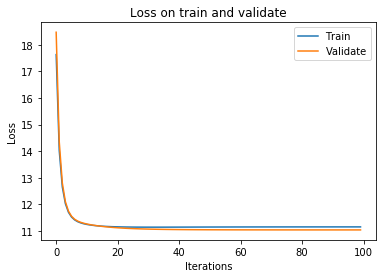

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    # read the dataset and get x and label y
    x, y = ds.load_svmlight_file("/Users/zoushuai/Downloads/housing_scale.txt")
    # use train_test_split function to split the dataset.randomly choose 20% as the validate dataset
    x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2,random_state=23)
    x_train = x_train.toarray()
    x_validate = x_validate.toarray()
    return x_train, x_validate, y_train, y_validate

def linear_func(x, seta, b):
    sum_setaX = np.dot(seta,x)
    return sum_setaX + b
def loss_func(x_set,y_set,seta,b):
    loss = 0
    for x, y in zip(x_set, y_set):
        loss += np.square(y - linear_func(x, seta, b))/(2*x_set.shape[0])
    return loss
def bgd(x_set,y_set,seta,b,alpha):
    for x, y in zip(x_set, y_set):
        for j in range(x_train.shape[1]):
            delta_seta[j] = alpha * (y - linear_func(x, seta, b)) * x[j]
            seta[j] = seta[j] + delta_seta[j]
            delta_b = alpha * (y - linear_func(x, seta, b))
            b = b + delta_b
    return seta,b
if __name__ == '__main__':
    #get test and validate datasets
    x_train, x_validate, y_train, y_validate = load_data()

    #initial some variable
    alpha = 0.01     #learning rate
    b = 0.1          #bias
    maxIters = 100;  #max Iterations
    seta = np.zeros(x_train.shape[1])
    delta_seta = [0 for i in range(x_train.shape[1])]
    delta_b = 0
    iter_num = []
    train_loss_sum = []
    validate_loss_sum = []

    for i in range(maxIters):
        seta,b= bgd(x_train,y_train,seta,b,alpha)
        #train loss
        train_loss = loss_func(x_train,y_train,seta,b)
        #validate loss
        validate_loss = loss_func(x_validate,y_validate,seta,b)
        iter_num.append(i)
        train_loss_sum.append(train_loss)
        validate_loss_sum.append(validate_loss)

    plt.plot(iter_num, train_loss_sum,label="Train")
    plt.plot(iter_num,validate_loss_sum,label="Validate")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss on train and validate")
    plt.legend(loc='upper right')
    plt.show()